In [2]:
!pip install opendatasets
!pip install pandas
!pip install -q kaggle
!pip install dash

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 50.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.0/228.0 kB 21.2 MB/s eta 0:00:00
  Attempting uninstall: Werkzeug
    Found existing installation: Werkzeug 3.1.3
    Uninstalling Werkzeug-3.1.3:
      Successfully uninstalled Werkzeug-3.1.3


In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"armutri","key":"129d3395464a8b400d13aaa17f027bd7"}'}

In [3]:
import os
# Move the kaggle.json file to the appropriate directory
os.makedirs('/root/.kaggle', exist_ok=True)
os.rename('kaggle.json', '/root/.kaggle/kaggle.json')

# Set permissions for the kaggle.json file
os.chmod('/root/.kaggle/kaggle.json', 0o600)

In [4]:
!kaggle datasets download -d noaa/hurricane-database


Dataset URL: https://www.kaggle.com/datasets/noaa/hurricane-database
License(s): CC0-1.0
  0% 0.00/901k [00:00<?, ?B/s]
100% 901k/901k [00:00<00:00, 96.8MB/s]


In [5]:
!unzip hurricane-database.zip -d /content/dataset


Archive:  hurricane-database.zip
  inflating: /content/dataset/atlantic.csv  
  inflating: /content/dataset/atlantic.pdf  
  inflating: /content/dataset/pacific.csv  
  inflating: /content/dataset/pacific.pdf  


In [6]:
import os

# List the files in the extracted directory
os.listdir('/content/dataset/')


['pacific.pdf', 'atlantic.csv', 'atlantic.pdf', 'pacific.csv']

In [7]:
# Open the file for reading
with open('/content/dataset/pacific.csv', 'r') as file:
  # Read the first 10 lines (adjust the number as needed)
  lines = file.readlines(10)

# Print the first few lines
print(lines)

['ID,Name,Date,Time,Event,Status,Latitude,Longitude,Maximum Wind,Minimum Pressure,Low Wind NE,Low Wind SE,Low Wind SW,Low Wind NW,Moderate Wind NE,Moderate Wind SE,Moderate Wind SW,Moderate Wind NW,High Wind NE,High Wind SE,High Wind SW,High Wind NW\n']


In [8]:
import pandas as pd

# Load the dataset from the uploaded file
file_path = ('/content/dataset/pacific.csv')
data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
data.head()


,ID,Name,Date,Time,Event,Status,Latitude,Longitude,Maximum Wind,Minimum Pressure,...,Low Wind SW,Low Wind NW,Moderate Wind NE,Moderate Wind SE,Moderate Wind SW,Moderate Wind NW,High Wind NE,High Wind SE,High Wind SW,High Wind NW
0,EP011949,UNNAMED,19490611,0,,TS,20.2N,106.3W,45,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
1,EP011949,UNNAMED,19490611,600,,TS,20.2N,106.4W,45,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
2,EP011949,UNNAMED,19490611,1200,,TS,20.2N,106.7W,45,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
3,EP011949,UNNAMED,19490611,1800,,TS,20.3N,107.7W,45,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
4,EP011949,UNNAMED,19490612,0,,TS,20.4N,108.6W,45,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26137 entries, 0 to 26136
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ID                26137 non-null  object        
 1   Name              26137 non-null  object        
 2   Date              26137 non-null  datetime64[ns]
 3   Time              26137 non-null  int64         
 4   Event             26137 non-null  object        
 5   Status            26137 non-null  object        
 6   Latitude          26137 non-null  float64       
 7   Longitude         26137 non-null  float64       
 8   Maximum Wind      26137 non-null  float64       
 9   Minimum Pressure  26137 non-null  float64       
 10  Low Wind NE       6387 non-null   object        
 11  Low Wind SE       6387 non-null   object        
 12  Low Wind SW       6387 non-null   object        
 13  Low Wind NW       6387 non-null   object        
 14  Moderate Wind NE  6387

In [18]:
display(data.isnull().sum())

,0
ID,0
Name,0
Date,0
Time,0
Event,0
Status,0
Latitude,0
Longitude,0
Maximum Wind,0
Minimum Pressure,0


In [10]:
# Step 1: Replace placeholder values (-999) with NaN
data.replace(-999, pd.NA, inplace=True)

# Step 2: Convert data types
# Convert Latitude and Longitude to numeric, adjusting for directional suffix
def convert_coordinates(coord):
    if pd.isna(coord):
        return None
    if coord[-1] in ['N', 'S']:
        value = float(coord[:-1])
        return value if coord[-1] == 'N' else -value
    elif coord[-1] in ['E', 'W']:
        value = float(coord[:-1])
        return value if coord[-1] == 'E' else -value

data['Latitude'] = data['Latitude'].apply(convert_coordinates)
data['Longitude'] = data['Longitude'].apply(convert_coordinates)

# Convert Date to datetime
data['Date'] = pd.to_datetime(data['Date'], format='%Y%m%d', errors='coerce')

# Step 3: Identify numerical columns for normalization
numerical_cols = ['Maximum Wind', 'Minimum Pressure']

# Step 4: Handle missing data
# Fill missing numerical values with mean or median
for col in numerical_cols:
    data[col].fillna(data[col].median(), inplace=True)

# Drop rows with critical missing values in key columns
data.dropna(subset=['Latitude', 'Longitude', 'Date'], inplace=True)

# Step 5: Normalize numerical data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

# Step 6: Drop irrelevant or highly missing columns
data.drop(columns=['Low Wind NE', 'Low Wind SE', 'Low Wind SW', 'Low Wind NW',
                   'Moderate Wind NE', 'Moderate Wind SE', 'Moderate Wind SW', 'Moderate Wind NW',
                   'High Wind NE', 'High Wind SE', 'High Wind SW', 'High Wind NW'], inplace=True)

# Step 7: Preview the cleaned dataset
data.head()


<ipython-input-10-59da548640bb>:28: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].median(), inplace=True)
<ipython-input-10-59da548640bb>:28: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

,ID,Name,Date,Time,Event,Status,Latitude,Longitude,Maximum Wind,Minimum Pressure
0,EP011949,UNNAMED,1949-06-11,0,,TS,20.2,-106.3,0.2,0.872483
1,EP011949,UNNAMED,1949-06-11,600,,TS,20.2,-106.4,0.2,0.872483
2,EP011949,UNNAMED,1949-06-11,1200,,TS,20.2,-106.7,0.2,0.872483
3,EP011949,UNNAMED,1949-06-11,1800,,TS,20.3,-107.7,0.2,0.872483
4,EP011949,UNNAMED,1949-06-12,0,,TS,20.4,-108.6,0.2,0.872483


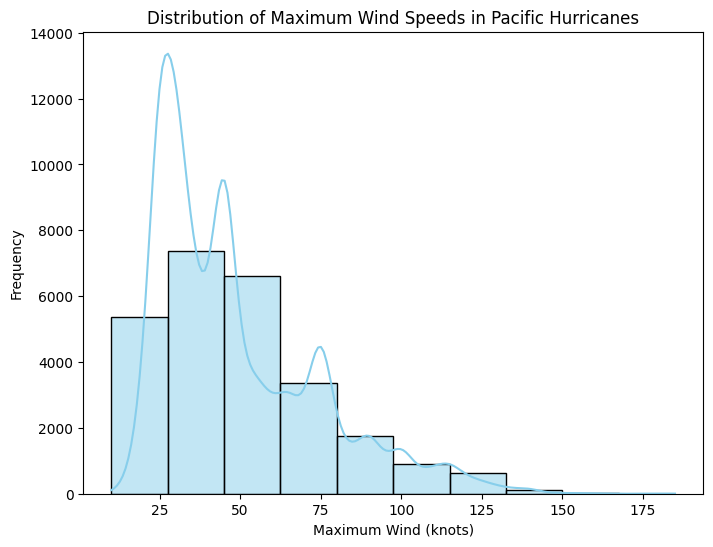

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/content/dataset/pacific.csv'
df = pd.read_csv(file_path)

# Visualize the distribution of Maximum Wind
plt.figure(figsize=(8, 6))
sns.histplot(df['Maximum Wind'].dropna(), kde=True, bins=10, color='skyblue')
plt.title('Distribution of Maximum Wind Speeds in Pacific Hurricanes')
plt.xlabel('Maximum Wind (knots)')
plt.ylabel('Frequency')
plt.show()


<ipython-input-26-d69d9a3411c0>:23: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



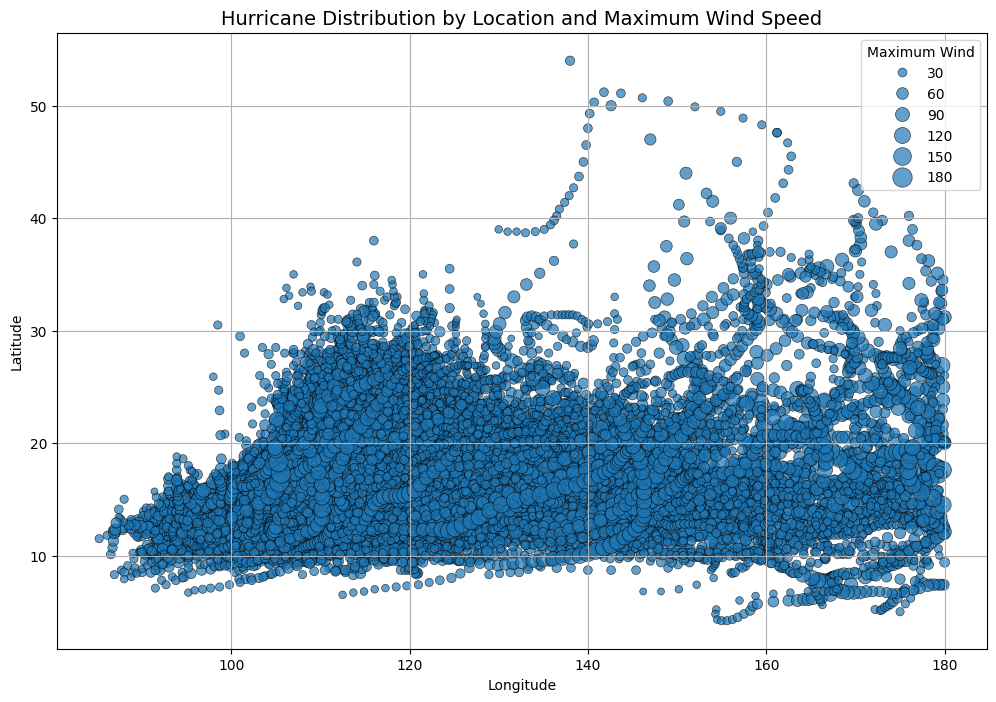

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/content/dataset/pacific.csv'
df = pd.read_csv(file_path)

# Ensure the necessary columns are clean
df = df[['Latitude', 'Longitude', 'Maximum Wind']].dropna()

# Convert Latitude and Longitude to numeric
# Replace 'N' and 'S' in 'Latitude' and convert to float
df['Latitude'] = df['Latitude'].str.replace('N', '').str.replace('S', '-').astype(float)

# Replace 'E' and 'W' in 'Longitude', then convert to float
df['Longitude'] = df['Longitude'].str.replace('E', '').str.replace('W', '-').str.rstrip('-').astype(float)
# The .str.rstrip('-') removes trailing hyphens before conversion


# Scatter plot: Longitude vs. Latitude
plt.figure(figsize=(12, 8))
scatter = sns.scatterplot(
    data=df, x='Longitude', y='Latitude', size='Maximum Wind',
    palette='coolwarm', sizes=(20, 200), alpha=0.7, edgecolor='k'
)

plt.title('Hurricane Distribution by Location and Maximum Wind Speed', fontsize=14)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()

In [13]:
import pandas as pd
import plotly.express as px
from dash import Dash, dcc, html, Input, Output

# Load the dataset
file_path = '/content/dataset/pacific.csv'
data = pd.read_csv(file_path)

# Clean and prepare the dataset (replicating key steps from earlier)
data.replace(-999, pd.NA, inplace=True)

def convert_coordinates(coord):
    if pd.isna(coord):
        return None
    if coord[-1] in ['N', 'S']:
        value = float(coord[:-1])
        return value if coord[-1] == 'N' else -value
    elif coord[-1] in ['E', 'W']:
        value = float(coord[:-1])
        return value if coord[-1] == 'E' else -value

data['Latitude'] = data['Latitude'].apply(convert_coordinates)
data['Longitude'] = data['Longitude'].apply(convert_coordinates)
data['Date'] = pd.to_datetime(data['Date'], format='%Y%m%d', errors='coerce')
data.dropna(subset=['Latitude', 'Longitude', 'Date'], inplace=True)

numerical_cols = ['Maximum Wind', 'Minimum Pressure']
for col in numerical_cols:
    data[col].fillna(data[col].median(), inplace=True)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

# Initialize the Dash app
app = Dash(__name__)

# Layout for the dashboard
app.layout = html.Div([
    html.H1("Hurricane Dataset Dashboard", style={'textAlign': 'center'}),

    dcc.Graph(id='map-visualization'),

    dcc.Graph(id='wind-distribution'),

    html.Label("Select Year:"),
    dcc.Dropdown(
        id='year-dropdown',
        options=[{'label': year, 'value': year} for year in sorted(data['Date'].dt.year.unique())],
        value=sorted(data['Date'].dt.year.unique())[0]
    ),

    dcc.Graph(id='wind-speed-trend')
])

# Callback to update visualizations
@app.callback(
    [
        Output('map-visualization', 'figure'),
        Output('wind-distribution', 'figure'),
        Output('wind-speed-trend', 'figure')
    ],
    [Input('year-dropdown', 'value')]
)
def update_visualizations(selected_year):
    filtered_data = data[data['Date'].dt.year == selected_year]

    # Map visualization of hurricane paths
    map_fig = px.scatter_geo(
        filtered_data, lat='Latitude', lon='Longitude',
        color='Maximum Wind',
        title=f"Hurricane Paths ({selected_year})",
        labels={'Maximum Wind': 'Wind Speed'},
        hover_name='Name'
    )

    # Wind speed distribution
    wind_fig = px.histogram(
        filtered_data, x='Maximum Wind', nbins=10,
        title="Wind Speed Distribution",
        labels={'Maximum Wind': 'Wind Speed'},
    )

    # Wind speed trend over time
    trend_fig = px.line(
        filtered_data, x='Date', y='Maximum Wind',
        title="Wind Speed Trend",
        labels={'Maximum Wind': 'Wind Speed'},
    )

    return map_fig, wind_fig, trend_fig

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)


<ipython-input-13-5346f05f72bc>:29: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].median(), inplace=True)
<ipython-input-13-5346f05f72bc>:29: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

<IPython.core.display.Javascript object>

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 93.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.0/228.0 kB 19.5 MB/s eta 0:00:00
  Attempting uninstall: Werkzeug
    Found existing installation: Werkzeug 3.1.3
    Uninstalling Werkzeug-3.1.3:
      Successfully uninstalled Werkzeug-3.1.3


In [ ]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler, StringIndexer
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder

# Initialize Spark Session
spark = SparkSession.builder.appName("ClassificationModel").getOrCreate()

# Load the dataset
data = spark.read.csv('/content/dataset/pacific.csv', header=True, inferSchema=True)

# Data Preparation
# Replace missing values in numerical columns
data = data.fillna({"Maximum Wind": 0, "Minimum Pressure": 0})

# Feature Engineering
# Index categorical columns (if any)
indexer = StringIndexer(inputCol="Name", outputCol="NameIndex", handleInvalid="skip")
data = indexer.fit(data).transform(data)

# Assemble features into a single vector
feature_cols = ["Maximum Wind", "Minimum Pressure"]
assembler = VectorAssembler(inputCols=feature_cols, outputCol="features")
data = assembler.transform(data)

# Add a label column (binary classification example, modify as needed)
data = data.withColumn("label", (data["Maximum Wind"] > 0.5).cast("integer"))

# Split the dataset
train_data, test_data = data.randomSplit([0.8, 0.2], seed=42)

# Model Training
lr = LogisticRegression(featuresCol="features", labelCol="label")

# Hyperparameter Tuning
paramGrid = ParamGridBuilder() \
    .addGrid(lr.regParam, [0.01, 0.1, 1.0]) \
    .addGrid(lr.elasticNetParam, [0.0, 0.5, 1.0]) \
    .build()

crossval = CrossValidator(
    estimator=lr,
    estimatorParamMaps=paramGrid,
    evaluator=MulticlassClassificationEvaluator(labelCol="label", metricName="accuracy"),
    numFolds=3
)

# Train the model using CrossValidator
cv_model = crossval.fit(train_data)

# Evaluate the model
test_results = cv_model.transform(test_data)
evaluator = MulticlassClassificationEvaluator(labelCol="label", metricName="accuracy")
accuracy = evaluator.evaluate(test_results)

print(f"Test Accuracy: {accuracy}")

# Stop Spark Session
spark.stop()


Test Accuracy: 1.0


Linear regression

In [ ]:
from pyspark.sql import SparkSession
from pyspark.ml.regression import LinearRegression
from pyspark.ml.feature import VectorAssembler

# Initialize Spark Session
spark = SparkSession.builder.appName('Linear Regression Pacific').getOrCreate()

# Load the dataset
data = spark.read.csv('/content/dataset/pacific.csv', header=True, inferSchema=True)

# Prepare the data for modeling
# Select relevant features and target
data = data.select('Maximum Wind', 'Minimum Pressure')
data = data.na.drop()

assembler = VectorAssembler(inputCols=['Maximum Wind'], outputCol='Features')
df_transformed = assembler.transform(data)

# Train a linear regression model
lr = LinearRegression(featuresCol='Features', labelCol='Minimum Pressure')
model = lr.fit(df_transformed)

# Print model coefficients
print(f'Coefficients: {model.coefficients}')
print(f'Intercept: {model.intercept}')

# Stop Spark Session
spark.stop()

Coefficients: [-1.6710573592013138]
Intercept: 99.97338652986993


Code 2: Logistic Regression with Pacific Dataset

In [ ]:
from pyspark.sql import SparkSession
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.feature import VectorAssembler

# Initialize Spark Session
spark = SparkSession.builder.appName('Logistic Regression Pacific').getOrCreate()

# Load the dataset
data = spark.read.csv('/content/dataset/pacific.csv', header=True, inferSchema=True)

# Prepare the data for modeling
# Define a binary label for classification
data = data.withColumn("Label", (data["Maximum Wind"] > 64).cast("integer"))
data = data.select('Maximum Wind', 'Minimum Pressure', 'Label').na.drop()

assembler = VectorAssembler(inputCols=['Maximum Wind', 'Minimum Pressure'], outputCol='Features')
df_transformed = assembler.transform(data)

# Train a logistic regression model
lr = LogisticRegression(featuresCol='Features', labelCol='Label')
model = lr.fit(df_transformed)

# Display coefficients and summary
print(f'Coefficients: {model.coefficients}')
print(f'Intercept: {model.intercept}')

# Stop Spark Session
spark.stop()


Coefficients: [6.006502582613163,-6.666029450867652e-05]
Intercept: -374.8719743717998


KMeans Clustering with Pacific Dataset

In [ ]:
from pyspark.sql import SparkSession
from pyspark.ml.clustering import KMeans
from pyspark.ml.feature import VectorAssembler

# Initialize Spark Session
spark = SparkSession.builder.appName('KMeans Clustering Pacific').getOrCreate()

# Load the dataset
data = spark.read.csv('/content/dataset/pacific.csv', header=True, inferSchema=True)

# Prepare the data for modeling
data = data.select('Maximum Wind', 'Minimum Pressure').na.drop()

assembler = VectorAssembler(inputCols=['Maximum Wind', 'Minimum Pressure'], outputCol='Features')
df_transformed = assembler.transform(data)

# Train a KMeans clustering model
kmeans = KMeans(featuresCol='Features', k=3)  # Assuming 3 clusters
model = kmeans.fit(df_transformed)

# Show cluster centers
centers = model.clusterCenters()
print(f'Cluster Centers: {centers}')

# Stop Spark Session
spark.stop()


Cluster Centers: [array([  49.79912527, -999.        ]), array([  36.32947428, 1002.86895046]), array([ 92.6372093 , 965.30769231])]
